In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data for analysis

In [2]:
DATE_DAILY = pd.Timestamp(1885, 2, 1)

daily_data = pd.read_csv('data/spx_d.csv', parse_dates=['Date'], infer_datetime_format=True)
daily_data = daily_data[daily_data['Date'] > DATE_DAILY]
daily_data.head()

,Date,Open,High,Low,Close,Volume
1150,1885-02-17,4.37,4.37,4.37,4.37,NaN
1151,1885-02-18,4.39,4.39,4.39,4.39,NaN
1152,1885-02-19,4.42,4.42,4.42,4.42,NaN
1153,1885-02-20,4.38,4.38,4.38,4.38,NaN
1154,1885-02-21,4.45,4.45,4.45,4.45,NaN


In [3]:
daily_data.to_csv('data/spx_day.csv')

# Some general anlyses on the S&P 500 data

In [8]:
weekly_data = daily_data.resample('W', on='Date').mean()
monthly_data = daily_data.resample('BM', on='Date').mean()
quarterly_data = daily_data.resample('BQ', on='Date').mean()
yearly_data = daily_data.resample('BA', on='Date').mean()

In [9]:
for df, timeframe in [(daily_data, "day"), (weekly_data, "week"), (monthly_data, "month"), (quarterly_data, "quater"), (yearly_data, "year")]:
    df['change_percent'] = df['Close'].pct_change()
    df['SMA_3'] = df['Close'].rolling(3).mean()
    df['SMA_10'] = df['Close'].rolling(30).mean()
    df['SMA_50'] = df['Close'].rolling(300).mean()

The first interesting question to consider is whether the S&P 500 has a positive expected return in the long run.
Only the does it make sense too consider it the a Kelly Criterion based strategy.

In [23]:
returns = pd.DataFrame()
returns['year'] = yearly_data['change_percent'].describe()
returns['quarter'] = quarterly_data['change_percent'].describe()
returns['month'] = monthly_data['change_percent'].describe()
returns['week'] = weekly_data['change_percent'].describe()
returns['day'] = daily_data['change_percent'].describe()
returns

,year,quarter,month,week,day
count,137.000000,548.000000,1644.000000,7147.000000,37477.000000
mean,0.063254,0.015364,0.005116,0.001167,0.000241
std,0.153120,0.071661,0.042406,0.019782,0.010528
min,-0.493300,-0.331988,-0.264664,-0.194315,-0.204669
25%,-0.031059,-0.024907,-0.015113,-0.008689,-0.004310
50%,0.071635,0.018052,0.007874,0.002576,0.000326
75%,0.169205,0.058545,0.028879,0.012035,0.005089
max,0.458966,0.336118,0.508160,0.185413,0.166096


We see that the S&P 500 has a yearly average return of 6.3%. The worst year-to-year return was -49% in 1932 and the highest year-to-year return was 45% in 1936. Below is a historical plot of year-to-year returns.

Text(0.5, 0, 'Yearly change in percent')

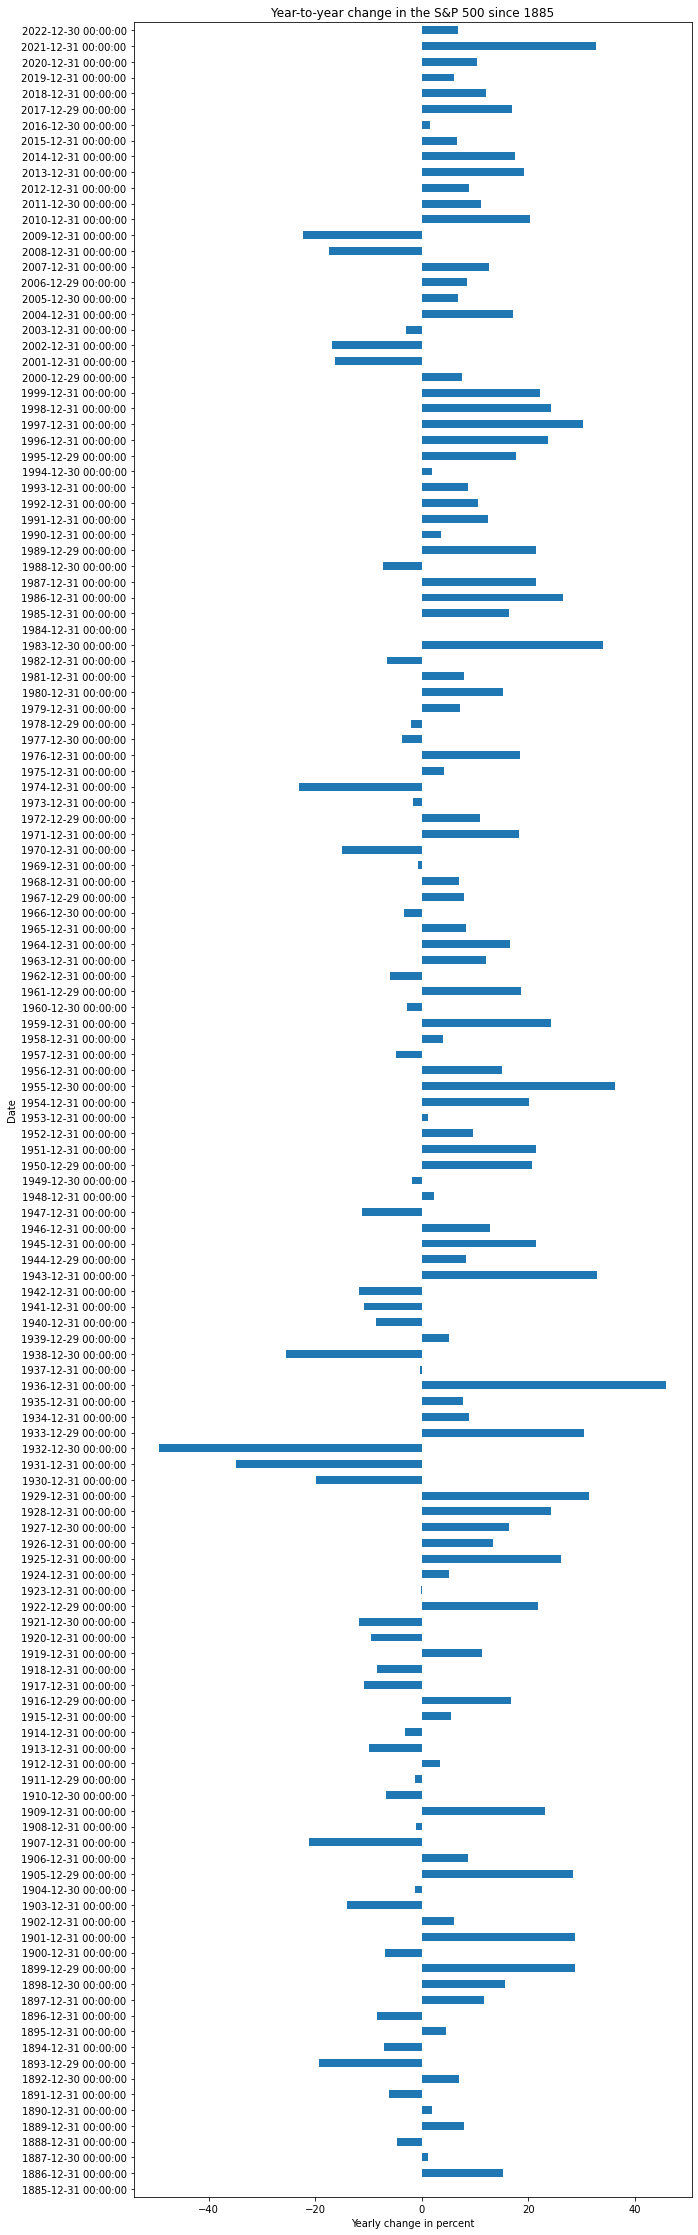

In [69]:
yearly_change = yearly_data['change_percent'] * 100.0

fig, ax = plt.subplots(figsize=(10, 40))
yearly_change.plot.barh(y='change_percent', figsize=(10, 40), title='Year-to-year change in the S&P 500 since 1885')

ax.set_xlabel('Yearly change in percent')


Now let's see how the returns are distributed. A huge one-time gain that is compensated by many small losses is not desirable for a strategy of continuous small bets. Ideally we want the distribution of positive returns to be greater than the distribution of negative returns.

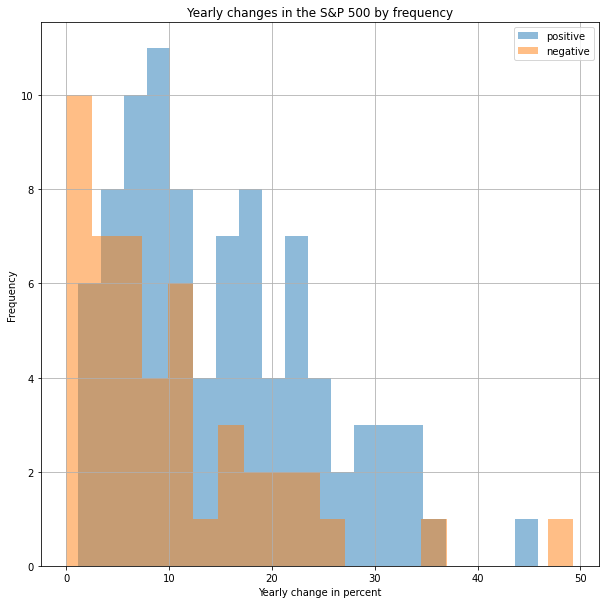

In [67]:
yearly_positive = yearly_data[yearly_data['change_percent'] > 0]['change_percent'] * 100.0
yearly_negative = yearly_data[yearly_data['change_percent'] < 0]['change_percent'] * -100.0

fig, ax = plt.subplots(figsize=(10, 10))
yearly_positive.hist(bins=20, figsize=(10, 10), alpha=0.5, label='positive')
yearly_negative.hist(bins=20, figsize=(10, 10), alpha=0.5, label='negative')

ax.set_xlabel('Yearly change in percent')
ax.set_ylabel('Frequency')
ax.set_title('Yearly changes in the S&P 500 by frequency')
ax.legend()